In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("intelligent_classroom_categorical_dataset.csv")

In [3]:
data

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,500,14,0.78,Writing,Easy,473,95,-0.73,5,Vocabulary,Good progress.,Reading → Grammar → Speaking,36.16,Low
4996,500,15,0.73,Reading,Medium,312,93,0.05,6,Grammar,Practice grammar rules.,Writing → Reading → Listening,40.83,Medium
4997,500,12,8.50,Writing,Easy,31,67,0.36,0,Vocabulary,Focus on synonyms.,Reading → Grammar → Speaking,31.96,Low
4998,500,11,2.13,Writing,Easy,103,61,-0.09,5,Pronunciation,Focus on synonyms.,Listening → Speaking → Writing,21.79,Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               5000 non-null   int64  
 1   age                      5000 non-null   int64  
 2   engagement_level         5000 non-null   float64
 3   task_type                5000 non-null   object 
 4   task_difficulty          5000 non-null   object 
 5   time_spent_on_task       5000 non-null   int64  
 6   accuracy_of_responses    5000 non-null   int64  
 7   emotion_score            5000 non-null   float64
 8   frustration_level        5000 non-null   int64  
 9   skill_gap                3734 non-null   object 
 10  personalized_feedback    5000 non-null   object 
 11  optimized_learning_path  5000 non-null   object 
 12  learning_progress        5000 non-null   float64
 13  progress_category        5000 non-null   object 
dtypes: float64(3), int64(5),

In [5]:
data.describe()

,student_id,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,learning_progress
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,250.500000,13.468400,4.942076,314.99840,74.648600,0.009420,5.112800,31.857064
std,144.351715,2.276673,2.880519,165.75942,14.552233,0.579803,3.141409,7.688118
min,1.000000,10.000000,0.000000,30.00000,50.000000,-1.000000,0.000000,8.430000
25%,125.750000,11.000000,2.457500,171.00000,62.000000,-0.490000,2.000000,26.140000
50%,250.500000,13.000000,4.880000,315.00000,74.000000,0.020000,5.000000,31.805000
75%,375.250000,15.000000,7.420000,459.00000,87.000000,0.510000,8.000000,37.410000
max,500.000000,17.000000,10.000000,599.00000,100.000000,1.000000,10.000000,54.830000


Text(0.5, 1.0, 'Outliers in engagement_level')

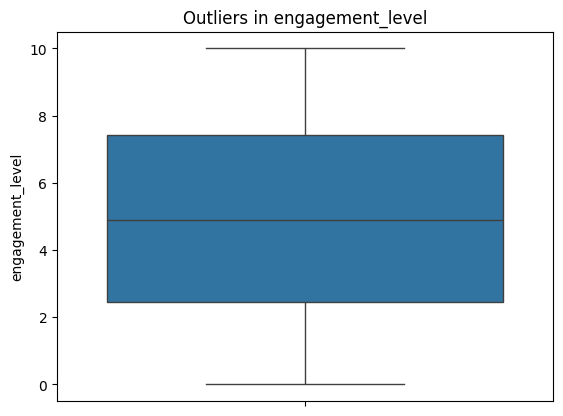

In [6]:
sns.boxplot(y=data["engagement_level"])
plt.title("Outliers in engagement_level")

In [7]:
data.isnull().sum()

student_id                    0
age                           0
engagement_level              0
task_type                     0
task_difficulty               0
time_spent_on_task            0
accuracy_of_responses         0
emotion_score                 0
frustration_level             0
skill_gap                  1266
personalized_feedback         0
optimized_learning_path       0
learning_progress             0
progress_category             0
dtype: int64

In [64]:
data

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category,task_difficulty_labeled,skill_gap_label,progress_category_label,task_type_label
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low,2,2,0,1
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low,0,3,0,1
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low,0,1,0,2
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium,1,1,1,0
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,500,14,0.78,Writing,Easy,473,95,-0.73,5,Vocabulary,Good progress.,Reading → Grammar → Speaking,36.16,Low,0,2,0,2
4996,500,15,0.73,Reading,Medium,312,93,0.05,6,Grammar,Practice grammar rules.,Writing → Reading → Listening,40.83,Medium,1,1,1,3
4997,500,12,8.50,Writing,Easy,31,67,0.36,0,Vocabulary,Focus on synonyms.,Reading → Grammar → Speaking,31.96,Low,0,2,0,2
4998,500,11,2.13,Writing,Easy,103,61,-0.09,5,Pronunciation,Focus on synonyms.,Listening → Speaking → Writing,21.79,Low,0,3,0,2


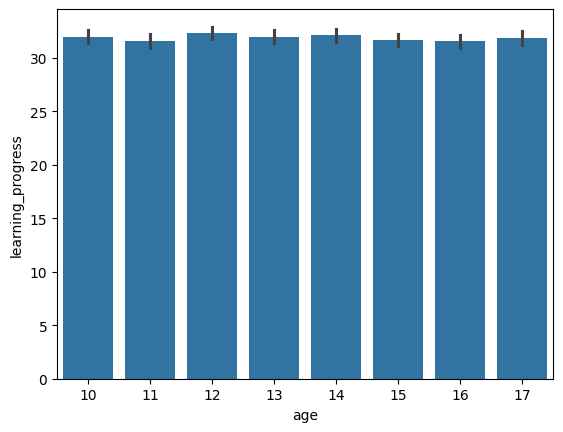

In [66]:
sns.barplot(x="age", y="learning_progress", data=data)
plt.show()

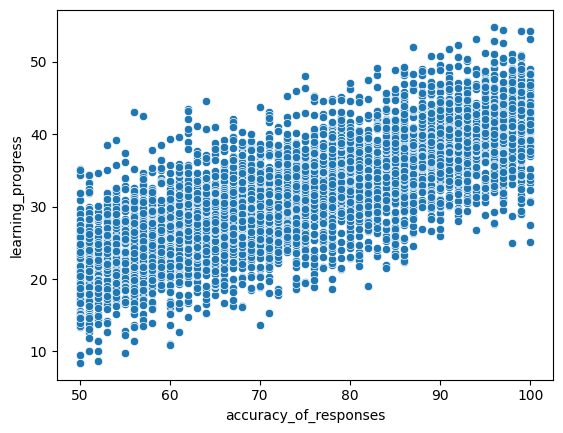

In [72]:
sns.scatterplot(data=data, x="accuracy_of_responses", y="learning_progress")
plt.show()

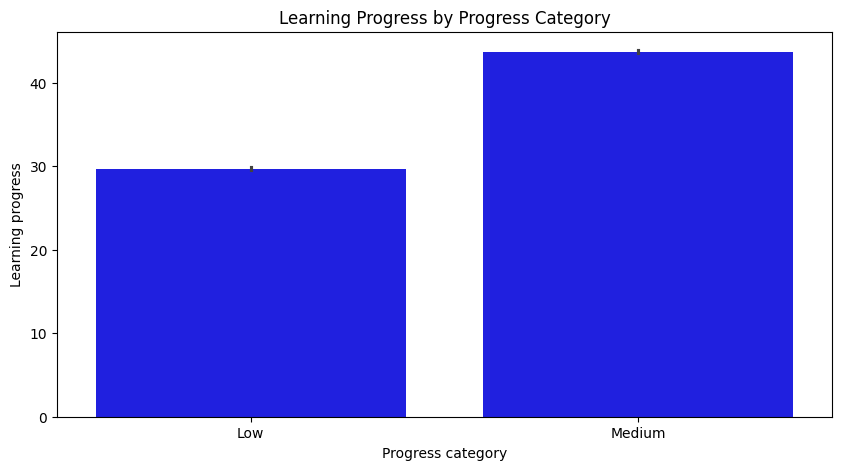

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(x="progress_category", y="learning_progress", data=data, color="blue")
plt.xlabel("Progress category")
plt.ylabel("Learning progress")
plt.title("Learning Progress by Progress Category")
plt.show()

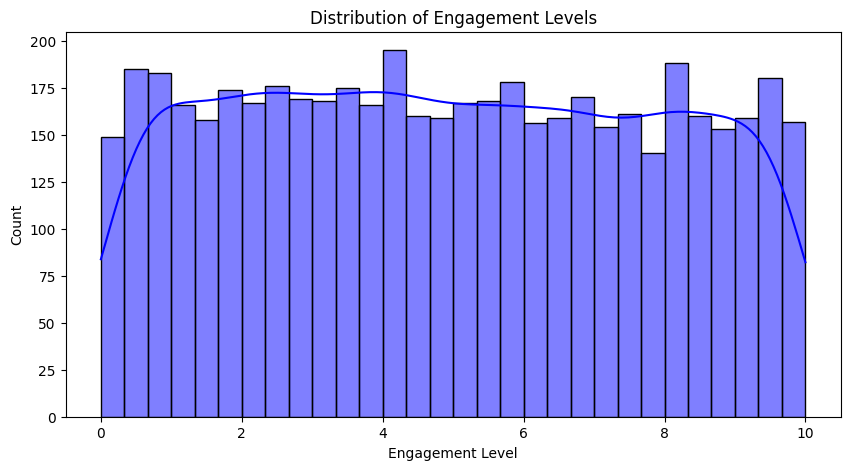

In [76]:
plt.figure(figsize=(10, 5))
sns.histplot(data["engagement_level"], bins=30, kde=True, color="blue")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.title("Distribution of Engagement Levels")
plt.show()

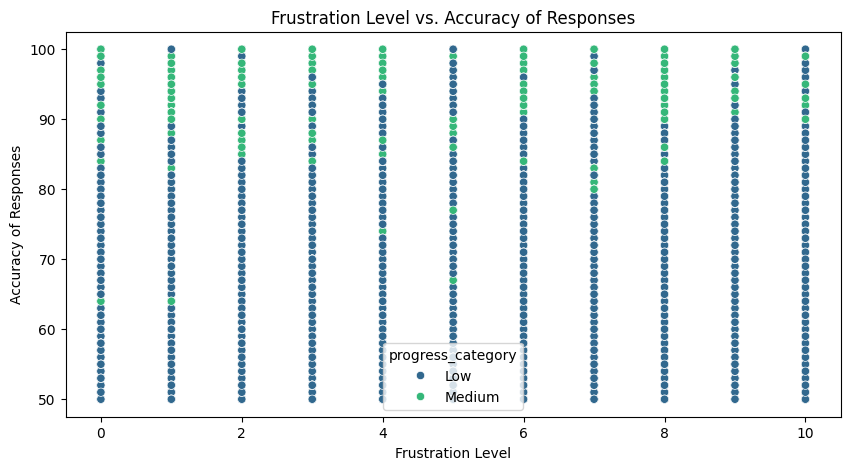

In [78]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="frustration_level", y="accuracy_of_responses", data=data, hue="progress_category", palette="viridis")
plt.xlabel("Frustration Level")
plt.ylabel("Accuracy of Responses")
plt.title("Frustration Level vs. Accuracy of Responses")
plt.show()

In [8]:
def task(value):
    if value == 'Easy':
        return 0
    elif value =='Medium':
        return 1
    elif value == 'Hard':
        return 2
    else: 
        return none
data['task_difficulty_labeled'] = data['task_difficulty'].apply(task)


In [9]:
data.skill_gap = data.skill_gap.fillna("No Gap")

In [10]:
data.skill_gap.value_counts()

skill_gap
Grammar          1297
No Gap           1266
Vocabulary       1225
Pronunciation    1212
Name: count, dtype: int64

In [11]:
def skill_gap_label(skill: str)-> int:
    if skill == "No Gap":
        return 0
    elif skill == "Grammar":
        return 1
    elif skill == "Vocabulary":
        return 2
    elif skill == "Pronunciation":
        return 3

data["skill_gap_label"] = data.skill_gap.apply(skill_gap_label)

In [12]:
data.progress_category.value_counts()

progress_category
Low       4226
Medium     774
Name: count, dtype: int64

In [13]:
def progress_category_label(progress: str)-> int:
    if progress == "Low":
        return 0
    elif progress == "Medium":
        return 1
        
data["progress_category_label"] = data.progress_category.apply(progress_category_label)

In [14]:
def task_type_label(task: str)-> int:
    if task == "Grammar":
        return 0
    elif task == "Speaking":
        return 1
    elif task == "Writing":
        return 2
    elif task == "Reading":
        return 3
    elif task == "Listening":
        return 4

data["task_type_label"] = data.task_type.apply(task_type_label)

In [15]:
data_num = data[["age", "engagement_level", "time_spent_on_task", "accuracy_of_responses", "emotion_score", "frustration_level", "task_difficulty_labeled", "skill_gap_label", "progress_category_label", "task_type_label", "learning_progress"]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'engagement_level'),
  Text(2, 0, 'accuracy_of_responses'),
  Text(3, 0, 'emotion_score'),
  Text(4, 0, 'frustration_level'),
  Text(5, 0, 'task_difficulty_labeled'),
  Text(6, 0, 'skill_gap_label'),
  Text(7, 0, 'progress_category_label'),
  Text(8, 0, 'task_type_label'),
  Text(9, 0, 'learning_progress')])

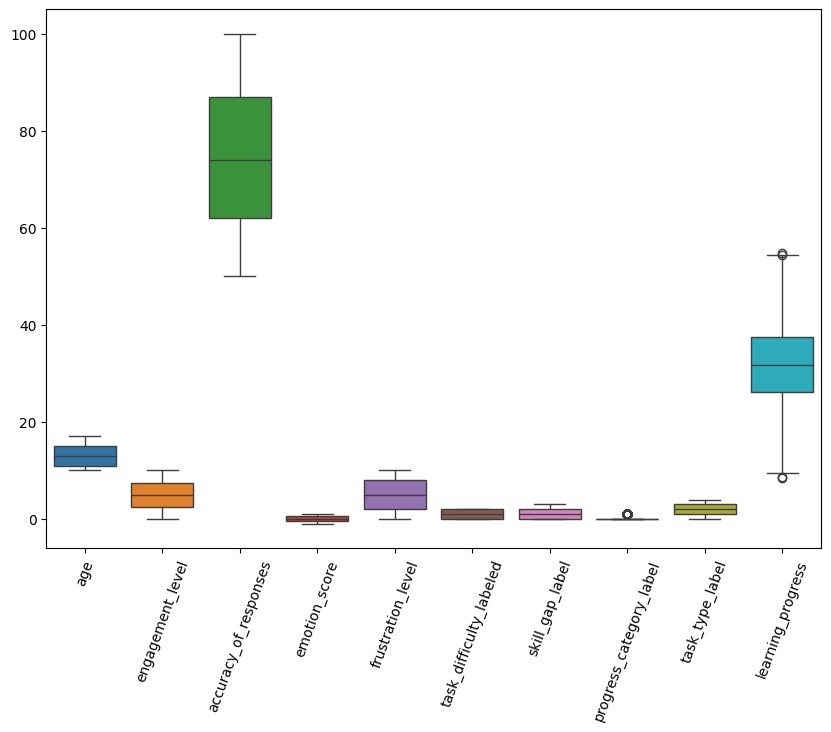

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=data_num.drop(columns=["time_spent_on_task"]))
plt.xticks(rotation=70)

In [17]:
Q1 = data_num["learning_progress"].quantile(.25)
Q3 = data_num["learning_progress"].quantile(.75)
IQR = Q3 - Q1
lower_lim = Q1 - IQR * 1.5
upper_lim = Q3 + IQR * 1.5
print(lower_lim, upper_lim)

9.235000000000007 54.31499999999999


In [18]:
data_num = data_num[(data_num.learning_progress >= lower_lim) & (data_num.learning_progress <= upper_lim)]

In [19]:
data_corr = data_num.corr()

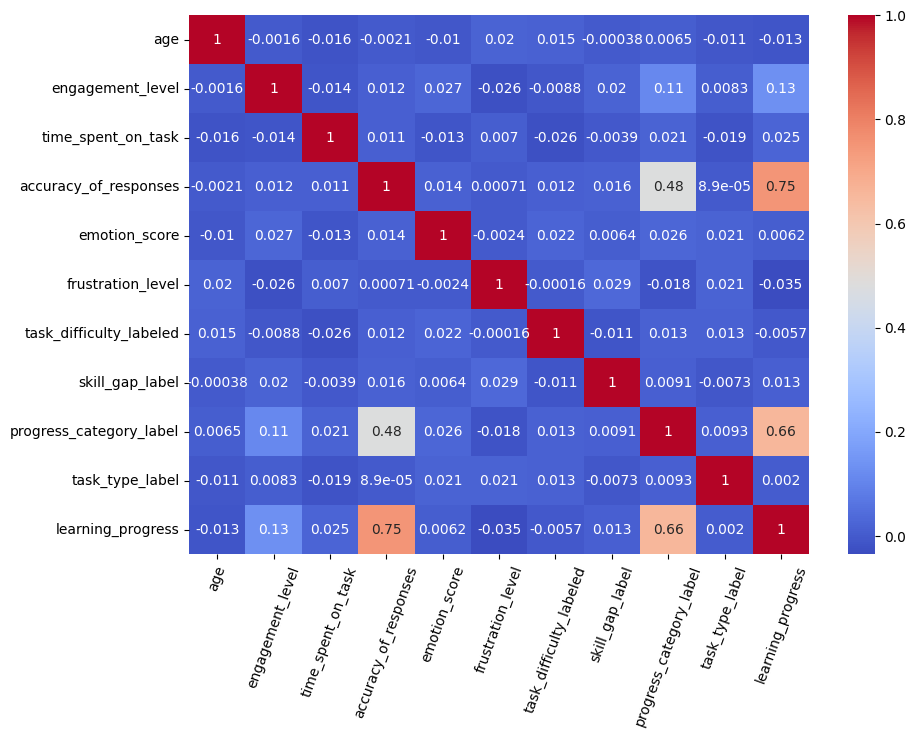

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=70)
plt.show()

### Test 1 - model "simplu" liniar
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [21]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=62)

In [23]:
model1 = LinearRegression()

In [24]:
model1.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred1 = model1.predict(X_test)

In [26]:
MAE = mean_absolute_error(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.396625805802294
MSE: 18.438490228905472
RMSE: 4.294006314492967


### Test 2 - model "simplu" liniar PolynomialFeatures
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [27]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [28]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
#     model = LinearRegression()

#     model.fit(X_train, y_train)

#     test_pred = model.predict(X_test)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [29]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [30]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
model2 = LinearRegression()

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [31]:
MAE = mean_absolute_error(y_test, y_pred2)
MSE = mean_squared_error(y_test, y_pred2)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.331269253457023
MSE: 17.912592540037004
RMSE: 4.232327083300274


### Test 3 - model "simplu" liniar scalat Polynomial Features
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [32]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [33]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     model = LinearRegression()

#     model.fit(X_train_scaled, y_train)

#     test_pred = model.predict(X_test_scaled)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [34]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [35]:
poly_conv = PolynomialFeatures(degree=2, include_bias = False)
X_conv = poly_conv.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

In [37]:
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)

In [39]:
X_test_scaled = scaler.transform(X_test)

In [40]:
model3 = LinearRegression()

In [41]:
model3.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
y_pred3 = model3.predict(X_test_scaled)

In [43]:
MAE = mean_absolute_error(y_test, y_pred3)
MSE = mean_squared_error(y_test, y_pred3)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.331269253457224
MSE: 17.912592540038954
RMSE: 4.232327083300504


### Test 4 - model "simplu" liniar Polynomial Features
#### age, engagement_level, accuracy_of_responses, progress_category_label, skill_gap_label Linear Regression

In [44]:
X = data_num[["age", "engagement_level", "accuracy_of_responses", "progress_category_label", "skill_gap_label"]]
y = data_num["learning_progress"]

In [45]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
model4 = LinearRegression()

model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

In [46]:
MAE = mean_absolute_error(y_test, y_pred4)
MSE = mean_squared_error(y_test, y_pred4)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.339465652240771
MSE: 17.94997068577876
RMSE: 4.236740573339222


In [47]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
#     model = LinearRegression()

#     model.fit(X_train, y_train)

#     test_pred = model.predict(X_test)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [48]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [49]:
data_num

,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,task_difficulty_labeled,skill_gap_label,progress_category_label,task_type_label,learning_progress
0,16,8.28,224,54,0.77,3,2,2,0,1,23.41
1,13,7.65,472,76,-0.54,0,0,3,0,1,31.58
2,14,5.74,332,53,0.41,6,0,1,0,2,24.91
3,16,9.56,77,96,-0.21,9,1,1,1,0,41.41
4,12,2.00,150,62,-0.76,1,1,1,0,3,25.39
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,0.78,473,95,-0.73,5,0,2,0,2,36.16
4996,15,0.73,312,93,0.05,6,1,1,1,3,40.83
4997,12,8.50,31,67,0.36,0,0,2,0,2,31.96
4998,11,2.13,103,61,-0.09,5,0,3,0,2,21.79


### Test 5 - model "simplu" liniar Polynomial Features scaled
#### toate coloanele Linear Regression

In [57]:
X = data_num.drop(columns=["learning_progress"])
y = data_num["learning_progress"]

In [62]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model5 = LinearRegression()

model5.fit(X_train_scaled, y_train)

y_pred5 = model5.predict(X_test_scaled)

In [63]:
MAE = mean_absolute_error(y_test, y_pred5)
MSE = mean_squared_error(y_test, y_pred5)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.3351304500839754
MSE: 17.938324538726796
RMSE: 4.235365927370006
